### Sentiment Analysis of Tweet data

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:

df = pd.read_csv('kashmir.txt',sep = '\t',names =['Tweets'])

In [4]:
df.head()

,Tweets
0,"1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"1498526212531970049,2022-03-01 05:11:04+00:00,..."


In [5]:
df.head()

,Tweets
0,"1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"1498526212531970049,2022-03-01 05:11:04+00:00,..."


In [6]:
df['Tweets'].iloc[0]

"1498905596648919040,2022-03-02 06:18:37+00:00,'New #developments paving their way in the #valley\\nThis #industrialization is a #blessing for Kashmir \\n#empowerment\\n#kashmirtourism https://t.co/b17gA6crzZ'"

In [7]:
type(df)

pandas.core.frame.DataFrame

**Text**

1.   Text Preprocessing
2.   Sentiment Analysis
3.   Keyword Extraction
4.   Entity Extraction





In [8]:
!pip install neattext

     |████████████████████████████████| 114 kB 7.5 MB/s 


In [9]:
#Load text cleaning package
import neattext.functions as nfx

** Noise**
1. remove mentions/userhandles
2. remove hashtages
3. urls
4. emojis
5. special char
6. white spaces









In [10]:
df['Tweets'].apply(nfx.extract_hashtags)

0       [#developments, #valley\nThis, #industrializat...
1       [#FloatingMarket, #KashmirTourism, #JannatEKas...
2       [#FloatingMarket, #Shikara, #KashmirTourism, #...
3       [#kashmirvalley, #kashmirtourism, #tourpackage...
4       [#Gulmarg, #VisitKashmir\n#KashmirTourism\n@ka...
                              ...                        
6379    [#InterlocutorTourism, #MillionDollarQuestion,...
6380                                   [#KashmirTourism"]
6381             [#kashmir, #kashmirtourism, #islamabad']
6382             [#kashmir, #kashmirtourism, #islamabad']
6383             [#Kashmir, #mykashmir, #kashmirtourism']
Name: Tweets, Length: 6384, dtype: object

In [11]:
#Cleaning hashtags
df['extracted_hashtags']=df['Tweets'].apply(nfx.extract_hashtags)

In [12]:
df[['extracted_hashtags','Tweets']]

,extracted_hashtags,Tweets
0,"[#developments, #valley\nThis, #industrializat...","1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"[#FloatingMarket, #KashmirTourism, #JannatEKas...","1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"[#FloatingMarket, #Shikara, #KashmirTourism, #...","1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"[#kashmirvalley, #kashmirtourism, #tourpackage...","1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"[#Gulmarg, #VisitKashmir\n#KashmirTourism\n@ka...","1498526212531970049,2022-03-01 05:11:04+00:00,..."
...,...,...
6379,"[#InterlocutorTourism, #MillionDollarQuestion,...","123754642487263233,2011-10-11 13:39:40+00:00,'..."
6380,"[#KashmirTourism""]","84195442568593408,2011-06-24 09:45:32+00:00,""@..."
6381,"[#kashmir, #kashmirtourism, #islamabad']","2640804451,2009-07-14 23:04:13+00:00,'RT @kash..."
6382,"[#kashmir, #kashmirtourism, #islamabad']","2628585089,2009-07-14 06:49:48+00:00,'Just add..."


In [13]:
#cleaning Tweets
df['clean_tweet'] = df['Tweets'].apply(nfx.remove_hashtags)

In [14]:
df[['Tweets','clean_tweet']]

,Tweets,clean_tweet
0,"1498905596648919040,2022-03-02 06:18:37+00:00,...","1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"1498591034674057219,2022-03-01 09:28:39+00:00,...","1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"1498590219091984390,2022-03-01 09:25:25+00:00,...","1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"1498589814417129473,2022-03-01 09:23:48+00:00,...","1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"1498526212531970049,2022-03-01 05:11:04+00:00,...","1498526212531970049,2022-03-01 05:11:04+00:00,..."
...,...,...
6379,"123754642487263233,2011-10-11 13:39:40+00:00,'...","123754642487263233,2011-10-11 13:39:40+00:00,'..."
6380,"84195442568593408,2011-06-24 09:45:32+00:00,""@...","84195442568593408,2011-06-24 09:45:32+00:00,""@..."
6381,"2640804451,2009-07-14 23:04:13+00:00,'RT @kash...","2640804451,2009-07-14 23:04:13+00:00,'RT @kash..."
6382,"2628585089,2009-07-14 06:49:48+00:00,'Just add...","2628585089,2009-07-14 06:49:48+00:00,'Just add..."


In [15]:
df['clean_tweet'].apply(nfx.extract_dates)

0       []
1       []
2       []
3       []
4       []
        ..
6379    []
6380    []
6381    []
6382    []
6383    []
Name: clean_tweet, Length: 6384, dtype: object

In [16]:
#Cleaning dates
df['extracted_dates']=df['clean_tweet'].apply(nfx.extract_dates)

In [17]:
#cleaning Tweets
df['clean_tweets'] = df['clean_tweet'].apply(nfx.remove_dates)

In [18]:
df[['clean_tweet','clean_tweets']]

,clean_tweet,clean_tweets
0,"1498905596648919040,2022-03-02 06:18:37+00:00,...","1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"1498591034674057219,2022-03-01 09:28:39+00:00,...","1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"1498590219091984390,2022-03-01 09:25:25+00:00,...","1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"1498589814417129473,2022-03-01 09:23:48+00:00,...","1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"1498526212531970049,2022-03-01 05:11:04+00:00,...","1498526212531970049,2022-03-01 05:11:04+00:00,..."
...,...,...
6379,"123754642487263233,2011-10-11 13:39:40+00:00,'...","123754642487263233,2011-10-11 13:39:40+00:00,'..."
6380,"84195442568593408,2011-06-24 09:45:32+00:00,""@...","84195442568593408,2011-06-24 09:45:32+00:00,""@..."
6381,"2640804451,2009-07-14 23:04:13+00:00,'RT @kash...","2640804451,2009-07-14 23:04:13+00:00,'RT @kash..."
6382,"2628585089,2009-07-14 06:49:48+00:00,'Just add...","2628585089,2009-07-14 06:49:48+00:00,'Just add..."


In [19]:
#df[['Tweets','clean_tweet']]

In [20]:
df['clean_tweets']= df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [21]:
df[['Tweets','clean_tweets']]

,Tweets,clean_tweets
0,"1498905596648919040,2022-03-02 06:18:37+00:00,...","1498905596648919040,2022-03-02 06:18:37+00:00,..."
1,"1498591034674057219,2022-03-01 09:28:39+00:00,...","1498591034674057219,2022-03-01 09:28:39+00:00,..."
2,"1498590219091984390,2022-03-01 09:25:25+00:00,...","1498590219091984390,2022-03-01 09:25:25+00:00,..."
3,"1498589814417129473,2022-03-01 09:23:48+00:00,...","1498589814417129473,2022-03-01 09:23:48+00:00,..."
4,"1498526212531970049,2022-03-01 05:11:04+00:00,...","1498526212531970049,2022-03-01 05:11:04+00:00,..."
...,...,...
6379,"123754642487263233,2011-10-11 13:39:40+00:00,'...","123754642487263233,2011-10-11 13:39:40+00:00,'..."
6380,"84195442568593408,2011-06-24 09:45:32+00:00,""@...","84195442568593408,2011-06-24 09:45:32+00:00,"" ..."
6381,"2640804451,2009-07-14 23:04:13+00:00,'RT @kash...","2640804451,2009-07-14 23:04:13+00:00,'RT Jus..."
6382,"2628585089,2009-07-14 06:49:48+00:00,'Just add...","2628585089,2009-07-14 06:49:48+00:00,'Just add..."


In [22]:
df['clean_tweets'].iloc[6380]

'84195442568593408,2011-06-24 09:45:32+00:00,"  So relieved that I\'m not the only one having run ins with the unhelpful, rude bumptious folks in  '

In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
#Cleaning Tweets :Remove Multiple white spaces
#df['tweets'] = df['Tweets'].apply(nfx.remove_dates)

In [25]:
#df['tweets']

In [26]:
df['clean_tweets'].iloc[0]

"1498905596648919040,2022-03-02 06:18:37+00:00,'New   paving their way in the     is a   for Kashmir \\n  https://t.co/b17gA6crzZ'"

In [27]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_multiple_spaces)

In [28]:
df['clean_tweets'].iloc[0]

"1498905596648919040,2022-03-02 06:18:37+00:00,'New paving their way in the is a for Kashmir \\n https://t.co/b17gA6crzZ'"

In [29]:
#Cleaning Tweets : Remove urls
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_urls)

In [30]:
df['clean_tweets'].iloc[0]

"1498905596648919040,2022-03-02 06:18:37+00:00,'New paving their way in the is a for Kashmir \\n "

In [31]:
#Cleaning Tweets: Punctuations
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_puncts)

In [32]:
df['clean_tweets'].iloc[0]

'149890559664891904020220302 06:18:37+00:00New paving their way in the is a for Kashmir \\n '

In [33]:
#Remove emojis
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_emojis) 

In [34]:

re.sub(r'\bRT\b', '', 'clean_tweets').strip()
df['clean_tweets']=df['clean_tweets'].apply(lambda x: re.sub(r'\bRT\b', '',x ).strip())

In [35]:
df[['Tweets','clean_tweets']]

,Tweets,clean_tweets
0,"1498905596648919040,2022-03-02 06:18:37+00:00,...",149890559664891904020220302 06:18:37+00:00New ...
1,"1498591034674057219,2022-03-01 09:28:39+00:00,...",149859103467405721920220301 09:28:39+00:00An a...
2,"1498590219091984390,2022-03-01 09:25:25+00:00,...",149859021909198439020220301 09:25:25+00:00An a...
3,"1498589814417129473,2022-03-01 09:23:48+00:00,...",149858981441712947320220301 09:23:48+00:00Know...
4,"1498526212531970049,2022-03-01 05:11:04+00:00,...",149852621253197004920220301 05:11:04+00:00 has...
...,...,...
6379,"123754642487263233,2011-10-11 13:39:40+00:00,'...",12375464248726323320111011 13:39:40+00:00 has ...
6380,"84195442568593408,2011-06-24 09:45:32+00:00,""@...",8419544256859340820110624 09:45:32+00:00 So re...
6381,"2640804451,2009-07-14 23:04:13+00:00,'RT @kash...",264080445120090714 23:04:13+00:00RT Just added...
6382,"2628585089,2009-07-14 06:49:48+00:00,'Just add...",262858508920090714 06:49:48+00:00Just added my...


In [36]:
df['clean_tweets'].iloc[0]

'149890559664891904020220302 06:18:37+00:00New paving their way in the is a for Kashmir \\n'

In [37]:
#df['clean_tweets'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)

In [38]:
df['clean_tweets'].iloc[0]

'149890559664891904020220302 06:18:37+00:00New paving their way in the is a for Kashmir \\n'

In [39]:
import string
df['clean_tweets'] = df['clean_tweets'].str.rstrip(string.digits)


In [40]:
df['clean_tweets'].iloc[0]

'149890559664891904020220302 06:18:37+00:00New paving their way in the is a for Kashmir \\n'

In [41]:
def cleanUpTweet(txt):
   txt = ''.join((ch for ch in txt if not ch.isdigit()))
   text =re.sub(r'@[^A-Za-z0-9]:+', '', txt)
   txt = re.sub(r'https?:\/\/[A-Za-z0-9\\n.\/]', '', txt)
   txt = re.sub('r:@[:+]+', '', txt)
   return txt

In [42]:
df['clean_tweets']=df['clean_tweets'].apply(cleanUpTweet)

In [43]:
df['clean_tweets'].iloc[0]

' ::+:New paving their way in the is a for Kashmir \\n'

In [44]:
df['clean_tweets'] = df['clean_tweets'].replace(r'\s+|\\n', ' ', regex=True)

In [45]:
df['clean_tweets'].iloc[0]

' ::+:New paving their way in the is a for Kashmir  '

In [46]:
import string
import nltk

In [47]:

df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [48]:
df['clean_tweets'].iloc[0]

'     New paving their way in the is a for Kashmir  '

In [49]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_tweets'] = df['clean_tweets'].apply(nfx.remove_multiple_spaces)

In [50]:
df['clean_tweets'].iloc[0]

' New paving their way in the is a for Kashmir '

In [51]:
df['clean_tweets']

0           New paving their way in the is a for Kashmir 
1        An artist by heart a navigator by profession ...
2        An artist by heart a navigator by profession ...
3        Know which are the best places to visit when ...
4        has emerged as a popular skiing destination P...
                              ...                        
6379     has surely comes to an end Which tourism will...
6380     So relieved that Im not the only one having r...
6381     RT Just added myself to the twitter directory...
6382     Just added myself to the twitter directory un...
6383     Just added myself to the twitter directory un...
Name: clean_tweets, Length: 6384, dtype: object

In [52]:
from textblob import TextBlob

In [53]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity <0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity':sentiment_polarity,
            'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result;

In [54]:
ex = df['clean_tweets'].iloc[0]

In [55]:
ex

' New paving their way in the is a for Kashmir '

In [56]:
get_sentiment(ex)

{'polarity': 0.13636363636363635,
 'sentiment': 'Positive',
 'subjectivity': 0.45454545454545453}

In [57]:
df['sentiment_results'] = df['clean_tweets'].apply(get_sentiment)

In [58]:
df['sentiment_results']

0       {'polarity': 0.13636363636363635, 'subjectivit...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 1.0, 'subjectivity': 0.3, 'sentim...
4       {'polarity': 0.5, 'subjectivity': 0.7, 'sentim...
                              ...                        
6379    {'polarity': 0.25, 'subjectivity': 0.444444444...
6380    {'polarity': -0.15, 'subjectivity': 0.8, 'sent...
6381    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
6382    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
6383    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 6384, dtype: object

In [59]:
pd.json_normalize(df['sentiment_results'].iloc[222])

,polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [60]:
df =df.join(pd.json_normalize(df['sentiment_results']))

In [61]:
df

,Tweets,extracted_hashtags,clean_tweet,extracted_dates,clean_tweets,sentiment_results,polarity,subjectivity,sentiment
0,"1498905596648919040,2022-03-02 06:18:37+00:00,...","[#developments, #valley\nThis, #industrializat...","1498905596648919040,2022-03-02 06:18:37+00:00,...",[],New paving their way in the is a for Kashmir,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
1,"1498591034674057219,2022-03-01 09:28:39+00:00,...","[#FloatingMarket, #KashmirTourism, #JannatEKas...","1498591034674057219,2022-03-01 09:28:39+00:00,...",[],An artist by heart a navigator by profession ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,"1498590219091984390,2022-03-01 09:25:25+00:00,...","[#FloatingMarket, #Shikara, #KashmirTourism, #...","1498590219091984390,2022-03-01 09:25:25+00:00,...",[],An artist by heart a navigator by profession ...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,"1498589814417129473,2022-03-01 09:23:48+00:00,...","[#kashmirvalley, #kashmirtourism, #tourpackage...","1498589814417129473,2022-03-01 09:23:48+00:00,...",[],Know which are the best places to visit when ...,"{'polarity': 1.0, 'subjectivity': 0.3, 'sentim...",1.000000,0.300000,Positive
4,"1498526212531970049,2022-03-01 05:11:04+00:00,...","[#Gulmarg, #VisitKashmir\n#KashmirTourism\n@ka...","1498526212531970049,2022-03-01 05:11:04+00:00,...",[],has emerged as a popular skiing destination P...,"{'polarity': 0.5, 'subjectivity': 0.7, 'sentim...",0.500000,0.700000,Positive
...,...,...,...,...,...,...,...,...,...
6379,"123754642487263233,2011-10-11 13:39:40+00:00,'...","[#InterlocutorTourism, #MillionDollarQuestion,...","123754642487263233,2011-10-11 13:39:40+00:00,'...",[],has surely comes to an end Which tourism will...,"{'polarity': 0.25, 'subjectivity': 0.444444444...",0.250000,0.444444,Positive
6380,"84195442568593408,2011-06-24 09:45:32+00:00,""@...","[#KashmirTourism""]","84195442568593408,2011-06-24 09:45:32+00:00,""@...",[],So relieved that Im not the only one having r...,"{'polarity': -0.15, 'subjectivity': 0.8, 'sent...",-0.150000,0.800000,Negative
6381,"2640804451,2009-07-14 23:04:13+00:00,'RT @kash...","[#kashmir, #kashmirtourism, #islamabad']","2640804451,2009-07-14 23:04:13+00:00,'RT @kash...",[],RT Just added myself to the twitter directory...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
6382,"2628585089,2009-07-14 06:49:48+00:00,'Just add...","[#kashmir, #kashmirtourism, #islamabad']","2628585089,2009-07-14 06:49:48+00:00,'Just add...",[],Just added myself to the twitter directory un...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [62]:
df['sentiment'].value_counts()

Neutral     4454
Positive    1685
Negative     245
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


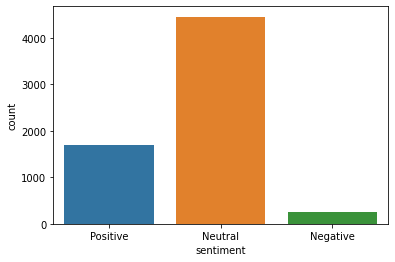

In [63]:
#Plot with searborn
import seaborn as sns
sns.countplot(df['sentiment'])

# Keyword Extraction
1.   For Positive and Negative sentiment
2.   For General



In [64]:
#Keyword Extraction
positive_tweet = df[df['sentiment'] =='Positive']['clean_tweets']

In [65]:
negative_tweet = df[df['sentiment']=='Negative']['clean_tweets']
neutral_tweet =  df[df["sentiment"]== 'Neutral']['clean_tweets']

In [66]:
positive_tweet

0           New paving their way in the is a for Kashmir 
3        Know which are the best places to visit when ...
4        has emerged as a popular skiing destination P...
5        You know it is beautiful when even with the f...
8        Just some fun with fresh snow Enroute Bangus ...
                              ...                        
6364                      Beautiful View of Lidder Valley
6369                                                 Best
6377              A view from Lalit Grand Palace Srinagar
6378     Top travel tips for a hassle free tour of Kas...
6379     has surely comes to an end Which tourism will...
Name: clean_tweets, Length: 1685, dtype: object

In [67]:
#Remove StopWords & Convert into Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).to_list()

In [68]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).to_list()
neutral_tweet_list  = neutral_tweet.apply(nfx.remove_stopwords).to_list()

In [69]:
positive_tweet_list

['New paving way Kashmir',
 'Know best places visit travel Kashmir Link',
 'emerged popular skiing destination People World visit Gulmarg learn enjoy sport giving boost tourism industry',
 'know beautiful faded colors appeals attracts end saying wow mountains Plains kashmir painted beautiful colours nature surely sooth soul Thats',
 'fun fresh snow Enroute Bangus Valley Kupwara JannateKashmir PC Nitin Ghorpade',
 'fun fresh snow Enroute Bangus Valley Kupwara JannateKashmir',
 'Local Shikara Lake Dal overlooking Pir Panjal Range Himalayas rays morning sun JannateKashmir India',
 'Local Shikara Lake Dal overlooking Pir Panjal Range Himalayas rays morning sun JannateKashmir India',
 'humongous potential easy picking add tremendous value ppl life Time fringe elements stopped supporting forms Peaceful environment sine quo non economic development Jai Hind',
 'arrival heavenliness guaranteed summer Explore Best Kashmir EMI Holidays Available Enquire web',
 'Kashmir details follow',
 'Snow gl

In [70]:
#Tokenization
for line in positive_tweet_list:
  # print line
  for token in line.split():
    print(token)

Streaming output truncated to the last 5000 lines.
Turn
Post
Notifications
better
things
beyondblueofficial
buroojtravelsofficial
mountain
reach
climbing
Thank
Shakil
Bhai
Khalid
Bhai
Yasir
Bhai
Aazan
Bhai
Zahir
Bhai
post
amazing
human
beings
Follow
exciting
stuff
Turn
Post
Notifications
best
view
comes
hardest
climb
Sonmarg
Follow
best
view
comes
hardest
climb
Sonmarg
Follow
Aaa
vekho
Follow
exciting
stuff
Turn
Post
Notifications
June
July
best
days
life
feels
like
yesterday
akshaykumarchougala
Godi
Media
Follow
exciting
stuff
Turn
Post
Notifications
sunset
considered
nature
farewell
kiss
night
special
beautiful
captured
charmingly
beautiful
Dal
Lake
happiness
person
want
happiness
person
want
almighty
day
beautiful
Good
Morn
Follow
Kani
Shahar
miracle
single
flower
clearly
life
change
Monsoon
Makes
Relax
Travel
Safe
Travel
Happy
Woow
Beautiful
Video
Beautiful
song
ishfaqkawa
Big
Breaking
Follow
exciting
stuff
Turn
Post
Notifications
Hotels
Best
Rates
Travel
Safe
Travel
Happy
Item
Don

In [71]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [72]:
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neut_tokens =[token for line in neutral_tweet_list for token in line.split()]

In [73]:
pos_tokens

['New',
 'paving',
 'way',
 'Kashmir',
 'Know',
 'best',
 'places',
 'visit',
 'travel',
 'Kashmir',
 'Link',
 'emerged',
 'popular',
 'skiing',
 'destination',
 'People',
 'World',
 'visit',
 'Gulmarg',
 'learn',
 'enjoy',
 'sport',
 'giving',
 'boost',
 'tourism',
 'industry',
 'know',
 'beautiful',
 'faded',
 'colors',
 'appeals',
 'attracts',
 'end',
 'saying',
 'wow',
 'mountains',
 'Plains',
 'kashmir',
 'painted',
 'beautiful',
 'colours',
 'nature',
 'surely',
 'sooth',
 'soul',
 'Thats',
 'fun',
 'fresh',
 'snow',
 'Enroute',
 'Bangus',
 'Valley',
 'Kupwara',
 'JannateKashmir',
 'PC',
 'Nitin',
 'Ghorpade',
 'fun',
 'fresh',
 'snow',
 'Enroute',
 'Bangus',
 'Valley',
 'Kupwara',
 'JannateKashmir',
 'Local',
 'Shikara',
 'Lake',
 'Dal',
 'overlooking',
 'Pir',
 'Panjal',
 'Range',
 'Himalayas',
 'rays',
 'morning',
 'sun',
 'JannateKashmir',
 'India',
 'Local',
 'Shikara',
 'Lake',
 'Dal',
 'overlooking',
 'Pir',
 'Panjal',
 'Range',
 'Himalayas',
 'rays',
 'morning',
 'sun',
 

In [74]:
# Get Most Commonest Keywords
from collections import Counter

In [75]:
def get_tokens(docx,num=30):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result

In [76]:
get_tokens(pos_tokens)

{'Beautiful': 75,
 'Best': 61,
 'Dal': 83,
 'Follow': 106,
 'Gulmarg': 62,
 'India': 70,
 'Jammu': 77,
 'Kashmir': 687,
 'Lake': 70,
 'Notifications': 71,
 'Post': 71,
 'Srinagar': 90,
 'Turn': 71,
 'amp': 128,
 'beautiful': 180,
 'beauty': 103,
 'best': 90,
 'co': 154,
 'exciting': 76,
 'kashmir': 45,
 'life': 54,
 'like': 45,
 'love': 49,
 'nature': 55,
 'place': 69,
 'stuff': 71,
 'time': 47,
 'valley': 62,
 'view': 51,
 'visit': 76}

In [77]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [78]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns= ['words','scores'])
pos_df

,words,scores
0,Kashmir,687
1,beautiful,180
2,co,154
3,amp,128
4,Follow,106
5,beauty,103
6,best,90
7,Srinagar,90
8,Dal,83
9,Jammu,77


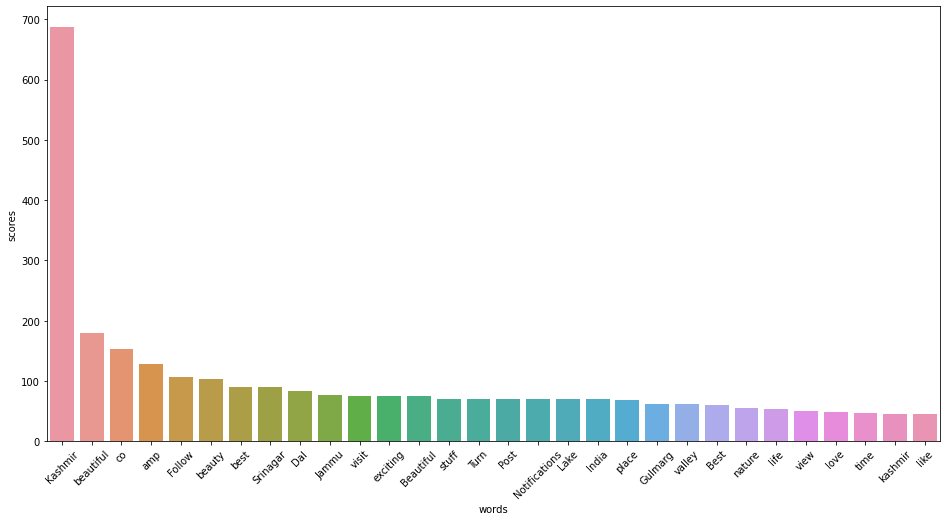

In [79]:
#Plot with seaborn
plt.figure(figsize=(16,8))
sns.barplot(x='words',y = 'scores',data= pos_df)
plt.xticks(rotation  =45)
plt.show()

In [80]:
#Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,Kashmir,73
1,amp,20
2,green,16
3,co,14
4,Experience,14
5,Endless,14
6,Attractions,14
7,snow,13
8,Lake,12
9,days,11


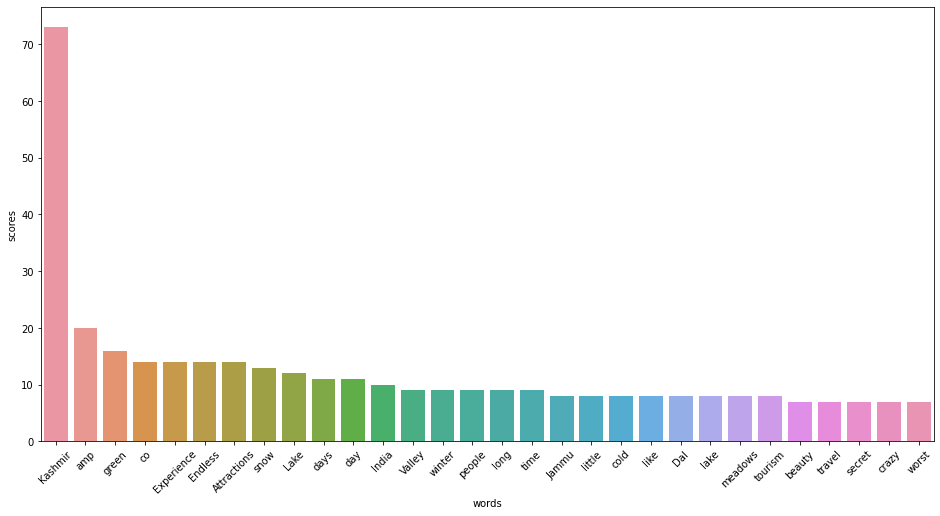

In [81]:
# Plot with sns for negative words
plt.figure(figsize=(16,8))
sns.barplot(x = 'words',y = 'scores',data =neg_df)
plt.xticks(rotation = 45)
plt.show()

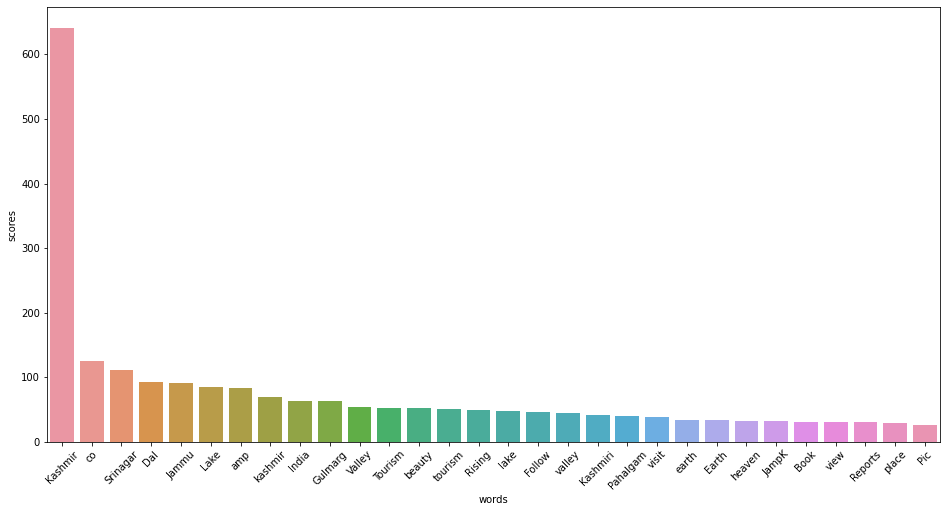

In [82]:
#Plot for neutal_df
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize = (16,8))
sns.barplot(x= 'words',y = 'scores',data = neut_df)
plt.xticks(rotation = 45)
plt.show()

In [83]:
#Word Cloud
from wordcloud import WordCloud

In [84]:
from matplotlib import interactive
def word_cloud(docx):
  plt.figure(figsize =(20,10))
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.axis = ('off')
  plt.show()

In [85]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neut_docx =' '.join(neut_tokens)

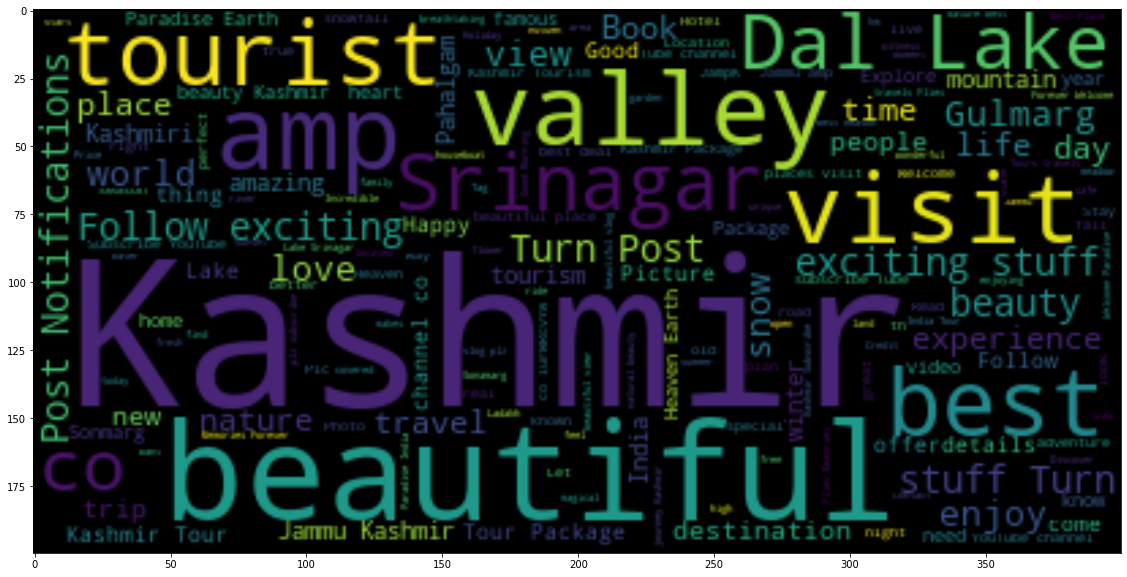

In [86]:
word_cloud(pos_docx)

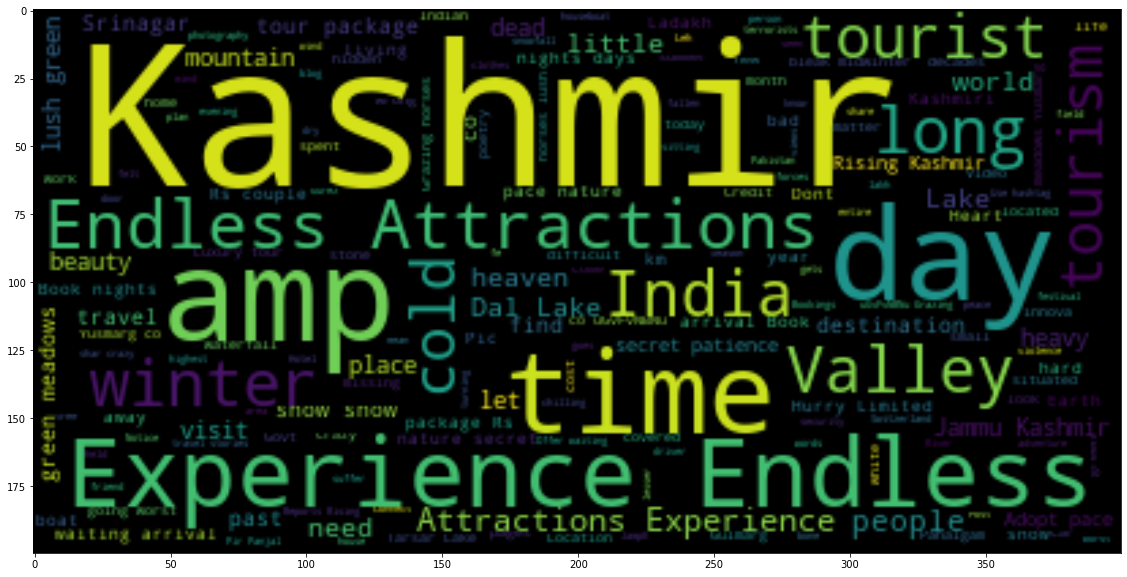

In [87]:
word_cloud(neg_docx)

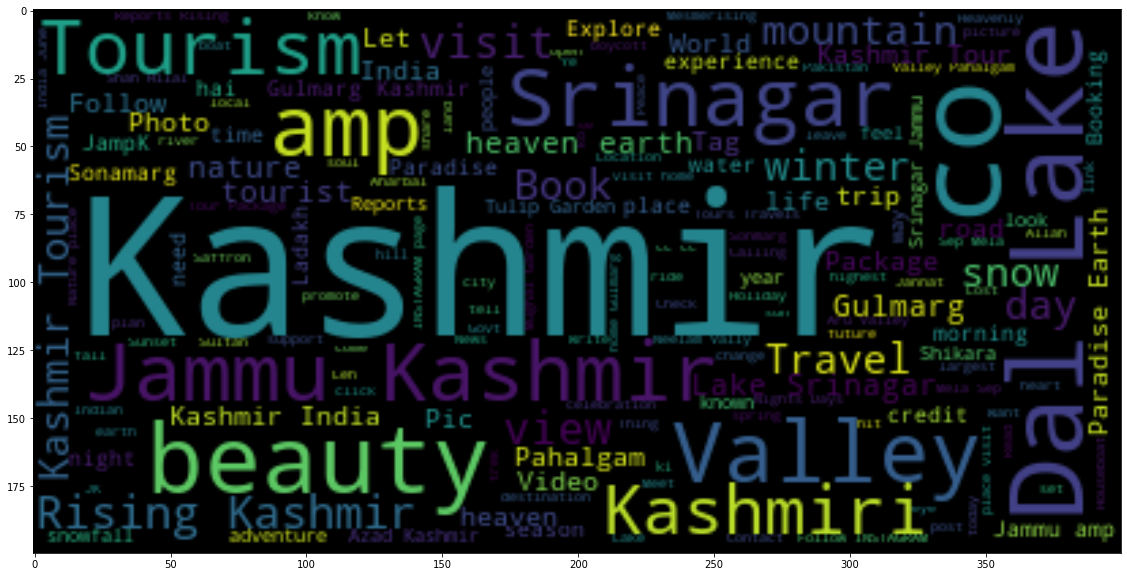

In [88]:
word_cloud(neut_docx)